# LSTM

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('twitter-stocks.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2254,2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029.0
2255,2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553.0
2256,2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848.0
2257,2022-10-26,52.950001,53.500000,52.770000,53.349998,53.349998,28064973.0
2258,2022-10-27,53.910000,54.000000,53.700001,53.700001,53.700001,136345128.0


In [5]:
df1=df.reset_index()['Close']

In [6]:
df1

0       44.900002
1       41.650002
2       42.900002
3       41.900002
4       42.599998
          ...    
2254    49.889999
2255    51.520000
2256    52.779999
2257    53.349998
2258    53.700001
Name: Close, Length: 2259, dtype: float64

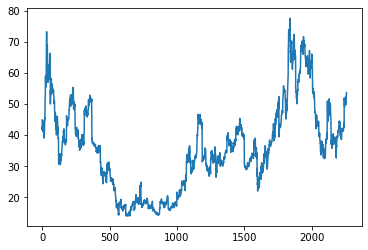

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [9]:
import numpy as np

In [10]:
df1

0       44.900002
1       41.650002
2       42.900002
3       41.900002
4       42.599998
          ...    
2254    49.889999
2255    51.520000
2256    52.779999
2257    53.349998
2258    53.700001
Name: Close, Length: 2259, dtype: float64

In [11]:
df1.shape

(2259,)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.48553919]
 [0.43445463]
 [0.45410254]
 ...
 [0.60939957]
 [0.618359  ]
 [0.62386047]]


In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(1468, 791)

In [16]:
train_data

array([[0.48553919],
       [0.43445463],
       [0.45410254],
       ...,
       [0.49182648],
       [0.49371266],
       [0.4754794 ]])

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(1417, 50)
(1417,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(740, 50)
(740,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
45/45 [==============================] - 7s 76ms/step - loss: 0.0120 - accuracy: 7.0572e-04 - val_loss: 0.0078 - val_accuracy: 0.0014
Epoch 2/100
45/45 [==============================] - 3s 58ms/step - loss: 0.0026 - accuracy: 7.0572e-04 - val_loss: 0.0068 - val_accuracy: 0.0014
Epoch 3/100
45/45 [==============================] - 3s 56ms/step - loss: 0.0022 - accuracy: 7.0572e-04 - val_loss: 0.0070 - val_accuracy: 0.0014
Epoch 4/100
45/45 [==============================] - 2s 54ms/step - loss: 0.0020 - accuracy: 7.0572e-04 - val_loss: 0.0048 - val_accuracy: 0.0014
Epoch 5/100
45/45 [==============================] - 2s 54ms/step - loss: 0.0017 - accuracy: 7.0572e-04 - val_loss: 0.0049 - val_accuracy: 0.0014
Epoch 6/100
45/45 [==============================] - 2s 55ms/step - loss: 0.0016 - accuracy: 7.0572e-04 - val_loss: 0.0069 - val_accuracy: 0.0014
Epoch 7/100
45/45 [==============================] - 2s 55ms/step - loss: 0.0016 - accuracy: 7.0572e-04 - val_loss: 0.0037 -

Epoch 55/100
45/45 [==============================] - 2s 54ms/step - loss: 4.0730e-04 - accuracy: 7.0572e-04 - val_loss: 6.4813e-04 - val_accuracy: 0.0014
Epoch 56/100
45/45 [==============================] - 2s 54ms/step - loss: 3.9091e-04 - accuracy: 7.0572e-04 - val_loss: 0.0010 - val_accuracy: 0.0014
Epoch 57/100
45/45 [==============================] - 2s 54ms/step - loss: 4.2375e-04 - accuracy: 7.0572e-04 - val_loss: 7.0797e-04 - val_accuracy: 0.0014
Epoch 58/100
45/45 [==============================] - 2s 54ms/step - loss: 3.7628e-04 - accuracy: 7.0572e-04 - val_loss: 0.0015 - val_accuracy: 0.0014
Epoch 59/100
45/45 [==============================] - 2s 54ms/step - loss: 3.9649e-04 - accuracy: 7.0572e-04 - val_loss: 6.8173e-04 - val_accuracy: 0.0014
Epoch 60/100
45/45 [==============================] - 3s 57ms/step - loss: 3.7661e-04 - accuracy: 7.0572e-04 - val_loss: 6.4629e-04 - val_accuracy: 0.0014
Epoch 61/100
45/45 [==============================] - 3s 58ms/step - loss: 5.6

In [26]:
import tensorflow as tf

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
MAE= mean_absolute_error(ytest,test_predict)
print('Mean Absolute Error is ',MAE)

Mean Absolute Error is  44.853632781444496


In [31]:
MSE = mean_squared_error(ytest,test_predict)
print('Mean Squared Error : ',MSE)

Mean Squared Error :  2156.6183035140734


In [33]:
MeAE=median_absolute_error(ytest,test_predict)
print('Median absolute Error : ',MeAE)

Median absolute Error :  42.29984885441735


In [34]:
EVS=explained_variance_score(ytest,test_predict)
print('Explained Variance is : ',EVS)

Explained Variance is :  -3596.487862415702
